In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

Схема правый уголок:

$$ \frac{( u^{n+1}_{m} - u^n_{m} )}{\tau} + a \frac{( u^n_{m+1} - u^n_{m} )}{2h} = 0 $$

Схема Лакса:
$$ \frac{( u^{n+1}_{m} - 0.5(u^n_{m-1} + u^n_{m+1}) )}{\tau} + a \frac{( u^n_{m+1} - u^n_{m-1} )}{h} = 0 $$

Схема левый уголок:

$$ \frac{( u^{n+1}_{m} - u^n_{m} )}{\tau} + a \frac{( u^n_{m} - u^n_{m-1} )}{h} = 0 $$

схема Лакса-Вендроффа:
$$ \frac{( u^{n+1}_{m} - u^n_{m} )}{\tau} + a \frac{( u^n_{m+1} - u^n_{m-1} )} {2h} - \frac{ a^2 \tau }{2} \frac{ u^n_{m+1} - 2u^n_{m} + u^n_{m-1} } {h^2} = 0 $$

Как бонус схема Мак-Кормака:
$$ u^{pred}_m = u^n_m - \frac{a\tau}{h} ( u^n_m - u^n_{m-1} ) $$
$$ u^{n+1}_m = 0.5 ( u^{pred}_m + u^n_m - \frac{a\tau}{h} ( u^{pred}_{m+1} - u^{pred}_m ) ) $$

# Первая задача

In [2]:
#схема Лакса
@njit
def Laks( sigma, u, f ):

  res = np.copy( u )

  for j in np.arange( 1, u.size - 1, 1 ):

    res[ j ] = 0.5 * ( res[ j + 1 ] + res[ j - 1 ] ) - sigma * 0.5 * ( res[ j + 1 ] - res[ j - 1 ] ) + f * tau

  return res

#Схема правый уголок
@njit
def RightUg( sigma, u, f ):

  res = np.copy( u )

  for j in np.arange( 0, u.size - 1, 1 ):

     res[ j ] = res[ j ] - sigma * ( res[ j + 1 ] - res[ j ] ) + tau * f

  return res

#Схема левый уголок
@njit
def LeftUg( sigma, u, f ):

  res = np.copy( u )

  for j in np.arange( 1, u.size, 1 ):

    res[ j ] = res[ j ] - sigma * ( res[ j ] - res[ j - 1 ] ) + tau * f

  return res

#cхема Лакса-Вендроффа
@njit
def LaksWen( sigma, u, f ):

  res = np.copy( u )

  for j in np.arange( 1, u.size - 1, 1 ):

    res[ j ] = res[ j ] - sigma * 0.5 * ( res[j + 1] - res[j - 1]) + sigma ** 2 * 0.5 * (  res[j + 1] - 2. * res[ j ] + res[j - 1] )

  return res

#схема Мак-Кормака
@njit
def MakKorm( sigma, u, f ):

  res = np.copy( u )

  for j in np.arange( 1, u.size - 1, 1 ):

    res_pred = res[ j ] - sigma * ( res[ j ] - res[ j - 1 ] )

    res_pred_plus = res[ j + 1 ] - sigma * ( res[ j + 1 ] - res[ j ] )

    res[ j ] = 0.5 * ( res_pred + res[ j ] - sigma * ( res_pred_plus - res_pred ) )

  return res

In [3]:
@njit
def Solut( time, tau, u, sigma, Meth ):

  N = int(time / tau)

  res = np.copy( u )

  for i in np.arange( 1, N, 1 ):

    res = Meth( sigma, res, 0.0 )

  return res

In [4]:
h = 0.05
a = 1.
sigma = 0.05
tau = np.fabs(sigma * h / a)
x = np.arange( 0, 100, h )
u0 = np.zeros(x.size)
u0[int(x.size / 30):int(x.size / 10)] = 10

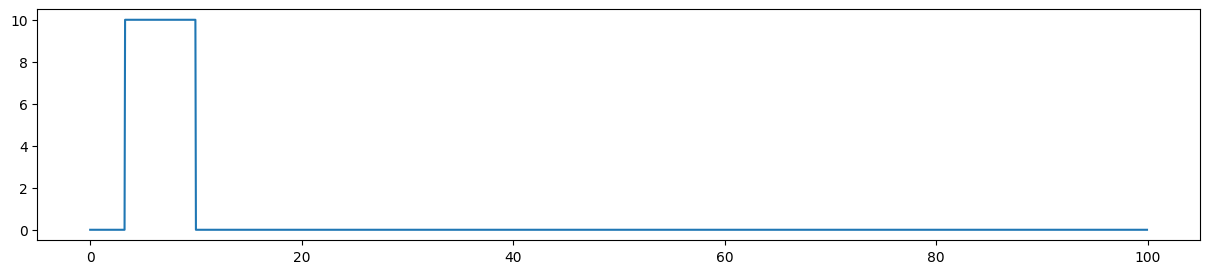

In [5]:
plt.figure( figsize = ( 15, 3 ) )
plt.plot(x, u0)

Графики получены для:


1.   $a > 0$ для схемы Лакса
2.   $a > 0$ для левого уголка
3.   $a < 0$ для правого уголка

В итоге правый уголок двигается влево. Лакс и левый уголок двигаются вправо.

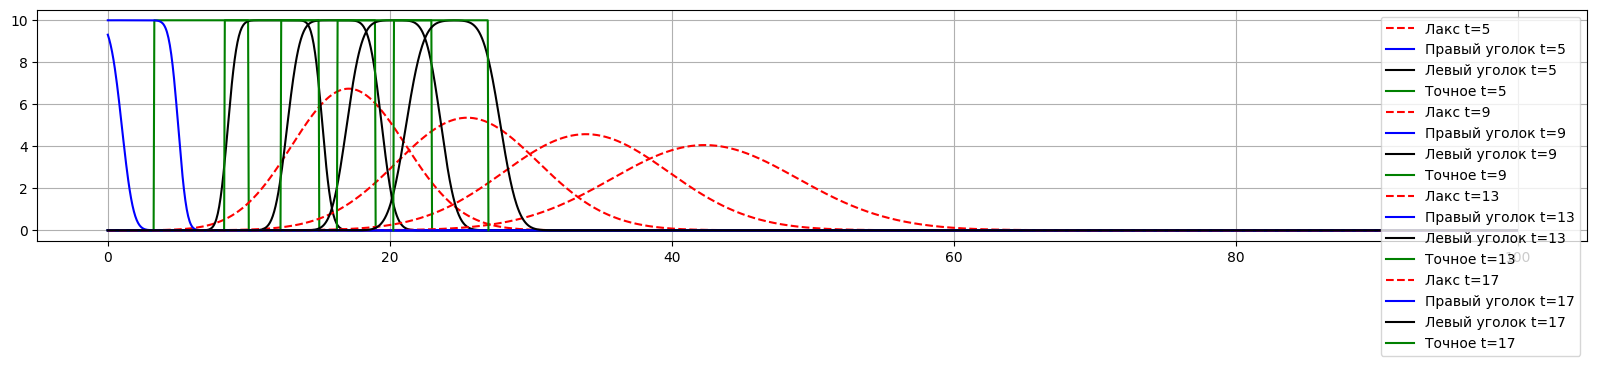

In [6]:
plt.figure( figsize = ( 20, 3 ) )
plt.plot(x, u0, 'g-')
for i in np.arange(5, 20,4):
  UL = Solut( i, tau, u0, sigma, Laks )
  Uug = Solut( i, tau, u0, -sigma, RightUg )
  Uul = Solut( i, tau, u0, sigma, LeftUg )
  plt.plot( x, UL, 'r--', label = 'Лакс t='+str(i) )
  plt.plot( x, Uug, 'b-', label = 'Правый уголок t='+str(i) )
  plt.plot( x, Uul, 'k-', label = 'Левый уголок t='+str(i) )
  plt.plot( x[int(x.size / 30)-1:int(x.size / 10) + 1] + a * i, u0[int(x.size / 30)-1:int(x.size / 10) + 1], 'g-', label = 'Точное t='+str(i) )
plt.grid()
plt.legend()

Методы Лакса-Вендорффа и Мак-Кормака в сравении с методом левого уголка

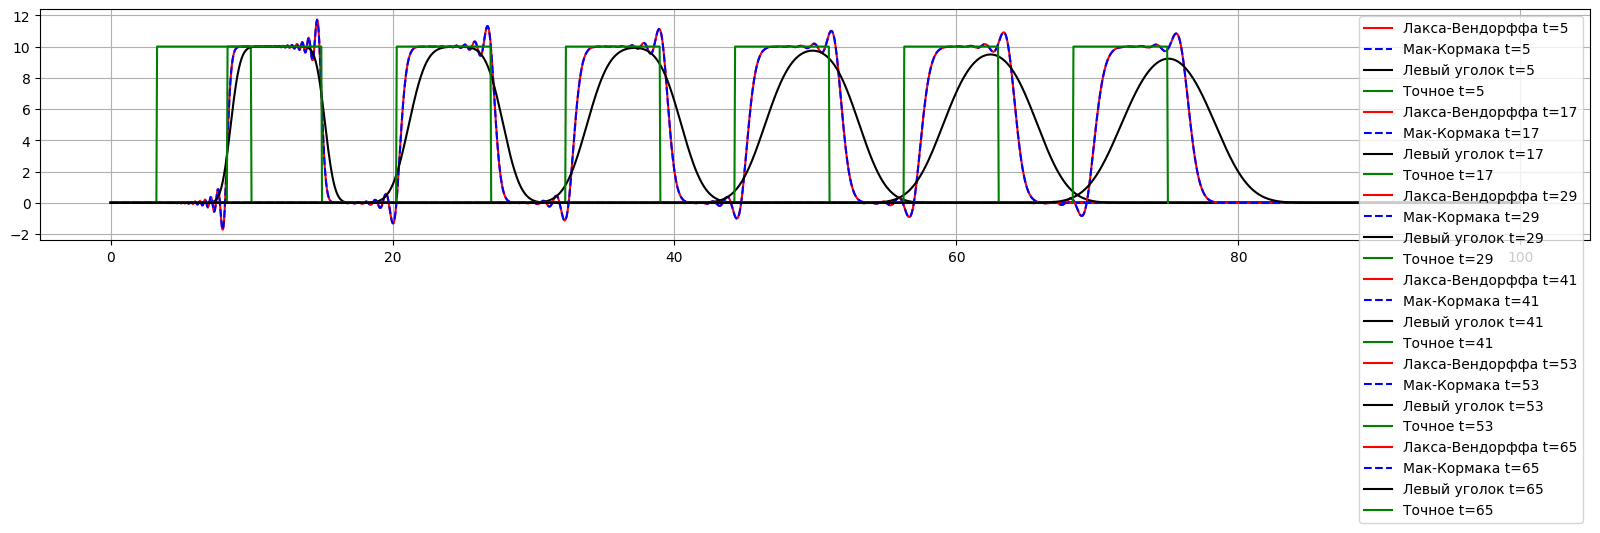

In [7]:
plt.figure( figsize = ( 20, 3 ) )
plt.plot(x, u0, 'g-')
for i in np.arange(5, 70,12):
  ULW = Solut( i, tau, u0, sigma, LaksWen )
  Uul = Solut( i, tau, u0, sigma, LeftUg )
  UMK = Solut( i, tau, u0, sigma, MakKorm )
  plt.plot( x, ULW, 'r-', label = 'Лакса-Вендорффа t='+str(i) )
  plt.plot( x, UMK, 'b--', label = 'Мак-Кормака t='+str(i) )
  plt.plot( x, Uul, 'k-', label = 'Левый уголок t='+str(i) )
  plt.plot( x[int(x.size / 30)-1:int(x.size / 10) + 1] + a * i, u0[int(x.size / 30)-1:int(x.size / 10) + 1], 'g-', label = 'Точное t='+str(i) )
plt.grid()
plt.legend()

In [8]:
u0 = np.zeros(x.size)
u0[:int(x.size / 10)] = 10

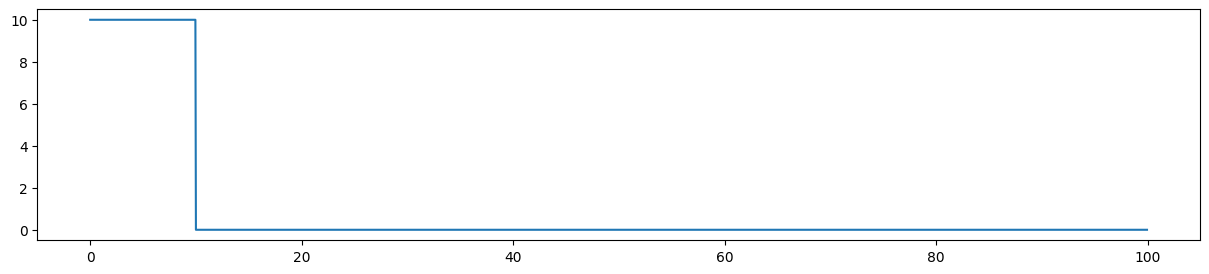

In [9]:
plt.figure( figsize = ( 15, 3 ) )
plt.plot(x, u0)

Графики получены для:


1.   $a > 0$ для схемы Лакса
2.   $a > 0$ для левого уголка
3.   $a < 0$ для правого уголка

В итоге правый уголок двигается влево. Лакс и левый уголок двигаются вправо.

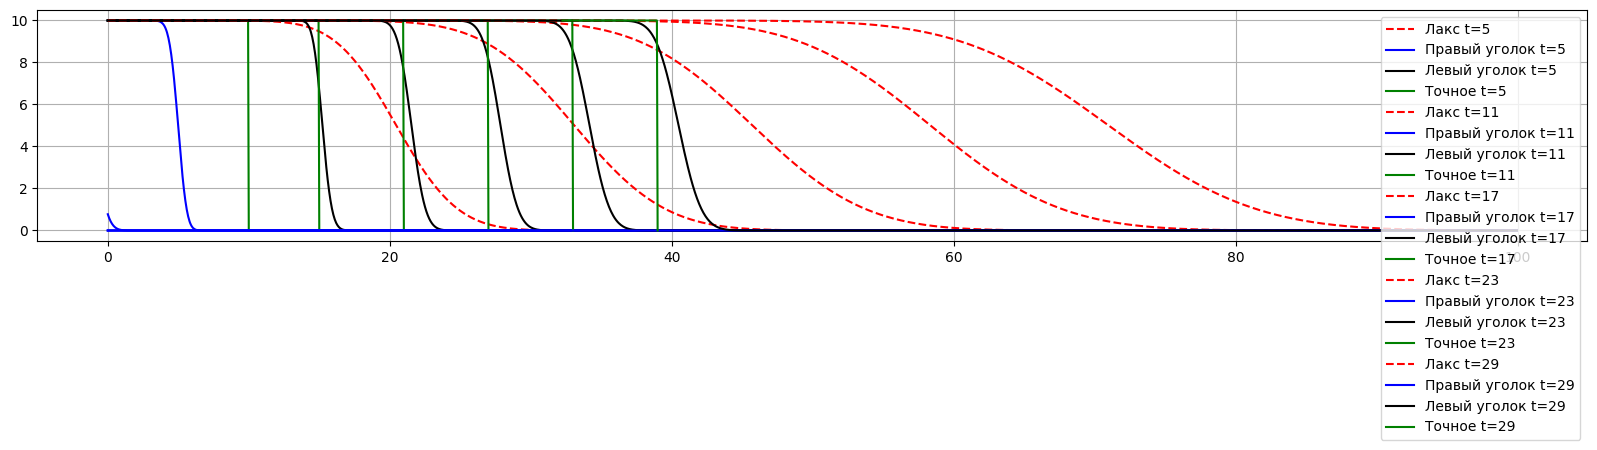

In [10]:
plt.figure( figsize = ( 20, 3 ) )
plt.plot(x, u0, 'g-')
for i in np.arange(5,30,6):
  UL = Solut( i, tau, u0, sigma, Laks )
  Uug = Solut( i, tau, u0, -sigma, RightUg )
  Uul = Solut( i, tau, u0, sigma, LeftUg )
  plt.plot( x, UL, 'r--', label = 'Лакс t='+str(i) )
  plt.plot( x, Uug, 'b-', label = 'Правый уголок t='+str(i) )
  plt.plot( x, Uul, 'k-', label = 'Левый уголок t='+str(i) )
  plt.plot( x[int(x.size / 30)-1:int(x.size / 10) + 1] + a * i, u0[int(x.size / 30)-1:int(x.size / 10) + 1], 'g-', label = 'Точное t='+str(i) )
plt.grid()
plt.legend()

Методы Лакса-Вендорффа и Мак-Кормака в сравении с методом левого уголка

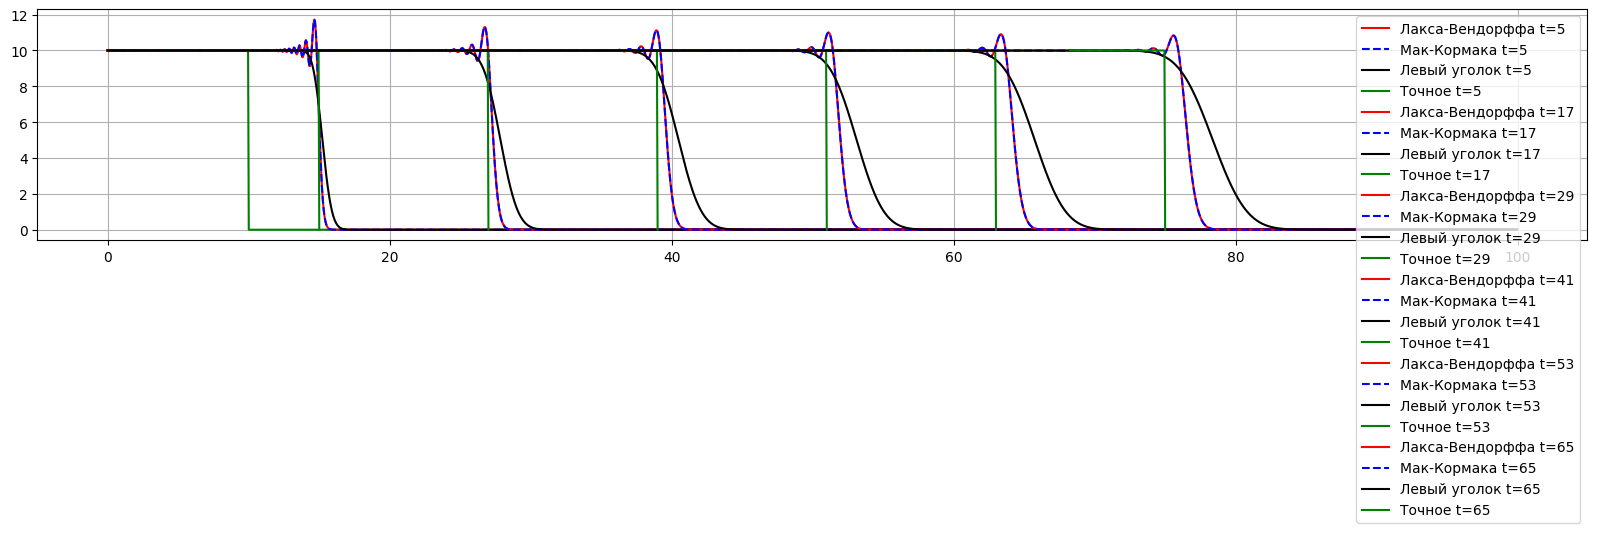

In [11]:
plt.figure( figsize = ( 20, 3 ) )
plt.plot(x, u0, 'g-')
for i in np.arange(5, 70,12):
  ULW = Solut( i, tau, u0, sigma, LaksWen )
  Uul = Solut( i, tau, u0, sigma, LeftUg )
  UMK = Solut( i, tau, u0, sigma, MakKorm )
  plt.plot( x, ULW, 'r-', label = 'Лакса-Вендорффа t='+str(i) )
  plt.plot( x, UMK, 'b--', label = 'Мак-Кормака t='+str(i) )
  plt.plot( x, Uul, 'k-', label = 'Левый уголок t='+str(i) )
  plt.plot( x[int(x.size / 30)-1:int(x.size / 10) + 1] + a * i, u0[int(x.size / 30)-1:int(x.size / 10) + 1], 'g-', label = 'Точное t='+str(i) )
plt.grid()
plt.legend()

Для методов Лакса-Вендорффа и Мак-Кормака можно добавить процедуру сглаживания

$$ u^{n+1}_{smooth} = u^{n+1}_m + q ( Q_{+} - Q_{-} ), $$
где $q \in [0, 0.25]$. Почти всегда работает $q=0.1$.
$$ D_{MM} = u^{n+1}_{m-1} - u^{n+1}_{m-2}; $$

$$ D_{M} = u^{n+1}_{m} - u^{n+1}_{m-1}; $$

$$ D_{P} = u^{n+1}_{m+1} - u^{n+1}_{m}; $$

$$ D_{PP} = u^{n+1}_{m+2} - u^{n+1}_{m+1}; $$

Если $D_{P} D_{PP} < 0$ или $D_{P} D_{M} < 0$, то  $Q_{+} = D_{P}$ или $Q_{+} = 0$ в противном случае.

Если $D_{P} D_{M} < 0$ или $D_{M} D_{MM} < 0$, то  $Q_{-} = D_{M}$ или $Q_{-} = 0$ в противном случае.

In [12]:
@njit
def Smooth( u ):

  res = np.copy( u )

  for j in np.arange( 2, u.size - 2, 1 ):

    d_pp = res[ j + 2 ] - res[ j + 1 ]
    d_p = res[ j + 1 ] - res[ j ]
    d_m = res[ j ] - res[ j - 1 ]
    d_mm = res[ j - 1 ] - res[ j - 2 ]

    if ( d_pp * d_p < 0 ) or ( d_p * d_m < 0 ):

      q_plus = d_p

    else:

      q_plus = 0.0

    if ( d_p * d_m < 0 ) or ( d_m * d_mm < 0 ):

      q_minus = d_m

    else:

      q_minus = 0.0

    res[ j ] = res[ j ] + 0.1 * ( q_plus - q_minus )

  return res



#cхема Лакса-Вендроффа
@njit
def LaksWenSmooth( sigma, u, f ):

  res = np.copy( u )

  for j in np.arange( 1, u.size - 1, 1 ):

    res[ j ] = res[ j ] - sigma * 0.5 * ( res[j + 1] - res[j - 1]) + sigma ** 2 * 0.5 * (  res[j + 1] - 2. * res[ j ] + res[j - 1] )

  res = Smooth( res )

  return res

#схема Мак-Кормака
@njit
def MakKormSmooth( sigma, u, f ):

  res = np.copy( u )

  for j in np.arange( 1, u.size - 1, 1 ):

    res_pred = res[ j ] - sigma * ( res[ j ] - res[ j - 1 ] )

    res_pred_plus = res[ j + 1 ] - sigma * ( res[ j + 1 ] - res[ j ] )

    res[ j ] = 0.5 * ( res_pred + res[ j ] - sigma * ( res_pred_plus - res_pred ) )

  res = Smooth( res )

  return res

In [13]:
u0 = np.zeros(x.size)
u0[int(x.size / 30):int(x.size / 10)] = 10

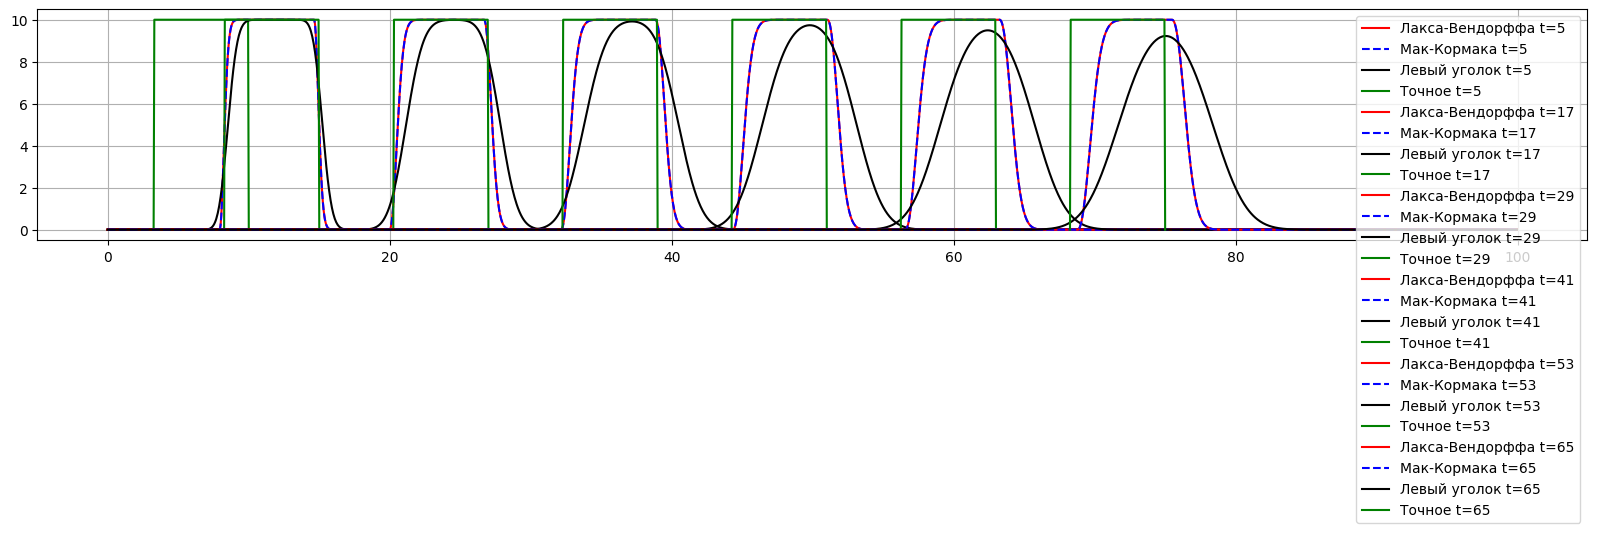

In [14]:
plt.figure( figsize = ( 20, 3 ) )
plt.plot(x, u0, 'g-')
for i in np.arange(5, 70,12):
  ULW = Solut( i, tau, u0, sigma, LaksWenSmooth )
  Uul = Solut( i, tau, u0, sigma, LeftUg )
  UMK = Solut( i, tau, u0, sigma, MakKormSmooth )
  plt.plot( x, ULW, 'r-', label = 'Лакса-Вендорффа t='+str(i) )
  plt.plot( x, UMK, 'b--', label = 'Мак-Кормака t='+str(i) )
  plt.plot( x, Uul, 'k-', label = 'Левый уголок t='+str(i) )
  plt.plot( x[int(x.size / 30)-1:int(x.size / 10) + 1] + a * i, u0[int(x.size / 30)-1:int(x.size / 10) + 1], 'g-', label = 'Точное t='+str(i) )
plt.grid()
plt.legend()

In [15]:
u0 = np.zeros(x.size)
u0[:int(x.size / 10)] = 10

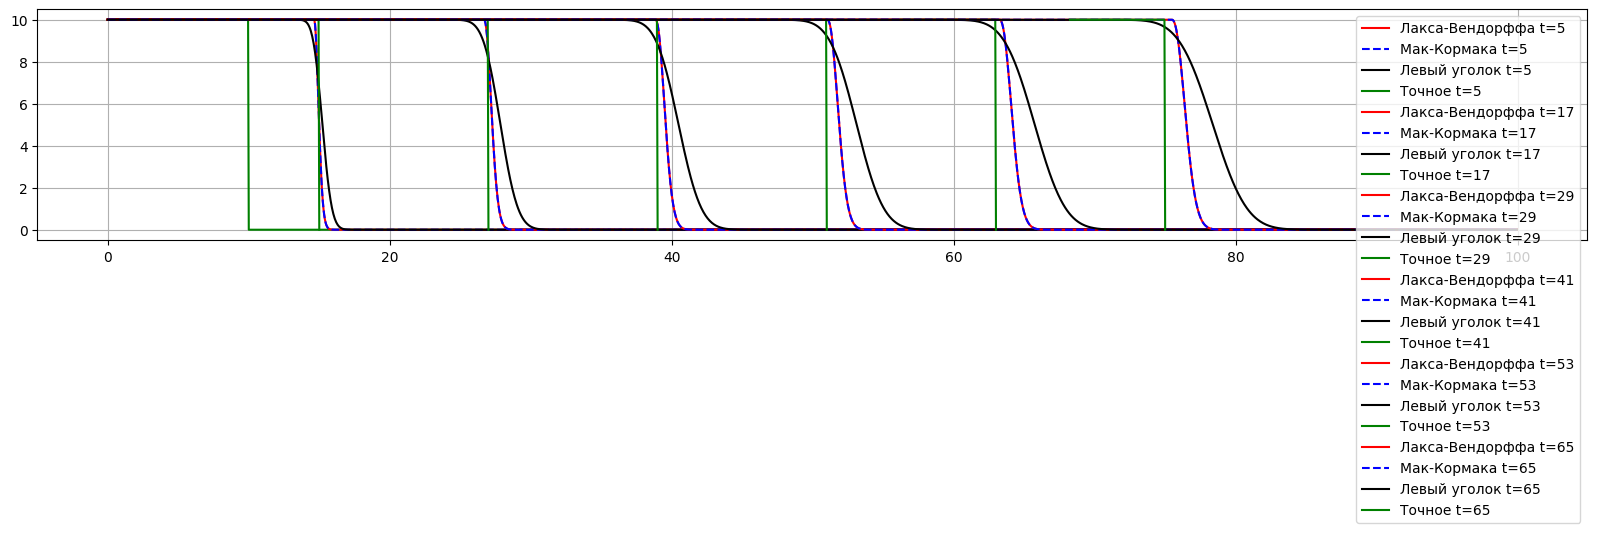

In [16]:
plt.figure( figsize = ( 20, 3 ) )
plt.plot(x, u0, 'g-')
for i in np.arange(5, 70,12):
  ULW = Solut( i, tau, u0, sigma, LaksWenSmooth )
  Uul = Solut( i, tau, u0, sigma, LeftUg )
  UMK = Solut( i, tau, u0, sigma, MakKormSmooth )
  plt.plot( x, ULW, 'r-', label = 'Лакса-Вендорффа t='+str(i) )
  plt.plot( x, UMK, 'b--', label = 'Мак-Кормака t='+str(i) )
  plt.plot( x, Uul, 'k-', label = 'Левый уголок t='+str(i) )
  plt.plot( x[int(x.size / 30)-1:int(x.size / 10) + 1] + a * i, u0[int(x.size / 30)-1:int(x.size / 10) + 1], 'g-', label = 'Точное t='+str(i) )
plt.grid()
plt.legend()